In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datafb.transfer.fb import home_initdn_1003, home_1003, pacs_1003, terra_1012
from datafb.transfer import home_fb_1002_top1, pacs_fb_1002_top1, terradn, home_pacs_terra_top1oracle, vlcs_1010
from datafb.transfer import home3dn_tr, pacs_fb_1001, home_fb_1001, home_fb_notransfer, home_fb, home0dn_tr, home2dn_transferrobustv3, home2dn_transferrobustv2, home2dn_transferrobust
from datafb.transfer import home2dn_transfer, homepacs_mixed, home0top1_patch, home3dn_patch, pacs_from_imagenet, home_from_imagenet, home0123dn, pacs0123dn, pacs3, home2dn, pacs1dn, pacs2dn, home3dn, pacs3dn, home0, home0top1, home0few, home0dn, home1, home1dn, pacs3few, pacs0, pacs0dn

In [3]:
from codeplot.plot import *
import matplotlib.pyplot as plt
key_acc_val="env_0_out_acc+env_1_out_acc+env_2_out_acc+env_3_out_acc/4"
key_acc_val0="env_1_out_acc+env_2_out_acc+env_3_out_acc/3"
key_acc_val1="env_0_out_acc+env_2_out_acc+env_3_out_acc/3"
key_acc_val2="env_0_out_acc+env_1_out_acc+env_3_out_acc/3"
key_acc_val3="env_0_out_acc+env_1_out_acc+env_2_out_acc/3"

key_acc_train="env_0_in_acc+env_1_in_acc+env_2_in_acc+env_3_in_acc/4"
key_acc_train0="env_1_in_acc+env_2_in_acc+env_3_in_acc/3"
key_acc_train1="env_0_in_acc+env_2_in_acc+env_3_in_acc/3"
key_acc_train2="env_0_in_acc+env_1_in_acc+env_3_in_acc/3"
key_acc_train3="env_0_in_acc+env_1_in_acc+env_2_in_acc/3"

dict_clean_labels = {
    "0_0": "100%",
    "0_20": "100% robust",
    "0top1_0": "100% top1",
    "0top1_20": "100% robust top1",
    "20_0": "50%",
    "20_20": "50% robust",
    "20top1_0": "50% top1",
    "20top1_20": "50% robust top1",
    "40_0": "33%",
    "40_20": "33% robust",
    "im_0": "0%",
    "im_20": "0% robust",
    "im_0_20": "0% patch",
}

In [4]:
FAKE = False
def plot_iter(ll_m, key1, orders=None, add_legend=True, key_axis1="acc", key_axis2=None, labels=None, key_annot=None, legends=None, title=None, markers=None, lines=[]):

    if labels is None:
        labels = [str(i) for i in range(len(ll_m))]
    if orders is None:
        orders = ["no", "no"]
    if not isinstance(orders, list):
        orders = [orders for i in range(len(ll_m))]
    if not FAKE: 
        fig, ax1 = plt.subplots()
        plt.xlabel(dict_key_to_label.get(key1, key1), fontsize="x-large")
        colors = cm.rainbow(np.linspace(0.3, 1, max(3, len(ll_m), len(lines))))
        ax1.set_ylabel(dict_key_to_label.get(key_axis1, key_axis1), fontsize="x-large")

    def plot_with_int(l, ax, color, label, key2, marker, linestyle, order):
        t = get_x(l, key1)
        if t == []:
            return

        l = [ll for ll in l if ll["step"] not in ["best", "last"]]
        ax.scatter(
            get_x(l, key1),
            get_x(l, key2),
            color=color,
            label=label,
            marker=marker
        )
        if key_annot:
            n = len(get_x(l, key1))
            for i in range(n):
                ax.annotate(get_x(l, key_annot)[i], (get_x(l, key1)[i], get_x(l, key2)[i]), color=color)

        if order != "no":
            fit_and_plot(key1, key2, l, order=order, label=label, color=color, ax=ax, linestyle=linestyle)
    
    dict_best_value = {}
    for i, l_m in enumerate(ll_m):
        marker = markers[i] if markers is not None else "."
        
        l_best = [ll for ll in l_m if
                  (ll["step"] in ["best"] if METRIC=="best" else
                   (ll["step"] in ["bestoracle"] if METRIC=="bestoracle" else
                  ll["step"] not in ["best", "bestoracle"] and (ll["step"] == "last" or ll["step"] > 4500)))
                 ]
        
        if not l_best:
            print(l_m)
            raise ValueError
            
        max_label = np.mean(sorted(get_x(l_best, key_axis1), reverse=True)) * 100
        dict_best_value[dict_key_to_label.get(i, labels[i])] = max_label
        if FAKE:
            continue
        plot_with_int(
            l_m,
            ax1,
            color=colors[i],
            label=dict_key_to_label.get(i, labels[i]) + ": " + "{max_label:.2f}".format(max_label=max_label),
            key2=key_axis1,
            marker=marker,
            order=orders[0],
            linestyle="-" if marker == "." else "--"
        )
    if FAKE:
        return {"fig": None, "dict_best_value": dict_best_value}
    if lines:
        for i, line in enumerate(lines):
            plt.axhline(
                y=get_x([line], key_axis1)[0],
                color=colors[i],
                linestyle='--' if i %2 else "-.",
                label=line["name"]
            )
    if key_axis1 in dict_key_to_limit:
        ax1.set_ylim(dict_key_to_limit[key_axis1])
    
    if key_axis2:
        ax2 = ax1.twinx()
        ax2.set_ylabel(dict_key_to_label.get(key_axis2, key_axis2), fontsize="x-large")

        for i, l_m in enumerate(ll_m):
            marker = markers[i] if markers is not None else "x"
            plot_with_int(
                l_m,
                ax2,
                color=colors[i],
                label=dict_key_to_label.get(i, labels[i]),
                key2=key_axis2,
                marker="x",
                order=orders[-1],
                linestyle="-" if marker == "." else "--"
            )
        if key_axis2 in dict_key_to_limit:
            ax2.set_ylim(dict_key_to_limit[key_axis2])
    if key1 in dict_key_to_limit:
        plt.xlim(dict_key_to_limit[key1])
    if add_legend:
        legend1 = ax1.legend(fontsize="x-large", loc="lower left")
        title1 = dict_key_to_label.get(key_axis1)
        if legends:
             title1= legends[0]
        legend1.set_title(title1, prop = {'size':15})
        if key_axis2:
            title2 = dict_key_to_label.get(key_axis2)
            if legends:
                title2 = legends[1]
            legend2 = ax2.legend(fontsize="x-large", loc="lower right")
            legend2.set_title(title2, prop = {'size':15})
    if title:
        fig.suptitle(title, fontsize=20)
    return {"fig": fig, "dict_best_value": dict_best_value}

In [5]:
pacs0dn.l["im_0"] = pacs0.l["im_0"]
pacs0dn.l["im_20"] = pacs0.l["im_20"]

pacs3dn.l["im_0"] = pacs3.l["im_0"]
pacs3dn.l["im_20"] = pacs3.l["im_20"]
pacs0dn.l["im_0_20"] = pacs_from_imagenet.l["env0_im0_dnf20"]
pacs1dn.l["im_0_20"] = homepacs_mixed.l["penv1_im_0_dnf20"]

pacs2dn.l["im_0_20"] = pacs_from_imagenet.l["env2_im0_dnf20"]
pacs3dn.l["im_0_20"] = pacs_from_imagenet.l["env3_im0_dnf20"]
pacs0123dn.l["im_0_20"] = pacs_from_imagenet.l["env0123_im0_dnf20"]

home0dn.l["im_0"] = home0.l["im_0"]
home0dn.l["im_20"] = home0.l["im_20"]
home1dn.l["im_0"] = home1.l["im_0"]
home1dn.l["im_20"] = home1.l["im_20"]

home0dn.l["im_0_20"] = home_from_imagenet.l["env0_im0_dnf20"]
home0dn.l["im_10_10"] = home_from_imagenet.l["env0_im10_dnf10"]
home0dn.l["im_0_200"] = homepacs_mixed.l["env0_im0_dnf200"]

home1dn.l["im_0_20"] = home_from_imagenet.l["env1_im0_dnf20"]
home1dn.l["im_0_p20"] = home_from_imagenet.l["env1_im0_dn20"]
home1dn.l["im_0_p20r20"] = home_from_imagenet.l["env1_im0_dn20r20"]
home1dn.l["im_0_200"] = homepacs_mixed.l["env1_im0_dnf200"]

home2dn.l["im_0_20"] = homepacs_mixed.l["env2_im0_dnf20"]

home3dn.l["im_0_20"] = home_from_imagenet.l["env3_im0_dnf20"]
home3dn.l["im_10_20"] = home3dn_patch.l["env0_im10_dnf20"]
home3dn.l["im_10_20"] = home3dn_patch.l["env0_im10_dnf20"]
home3dn.l["im_20_10"] = home3dn_patch.l["env0_im20_dnf10"]
home3dn.l["im_10_10"] = home3dn_patch.l["env0_im10_dnf10"]
home3dn.l["im_20_20"] = home3dn_patch.l["env0_im20_dnf20"]
# dict_keys(['env0_im10_dnf20', 'env0_im20_dnf10', 'env0_im10_dnf10', 'env0_im20_dnf20'])
home0123dn.l["im_0_20"] = home_from_imagenet.l["env0123_im0_dnf20"]

home2dn_transfer.l["im_tdn0"] = home2dn.l["im_0"]
home2dn_transferrobust.l["im_tdn0"] = home2dn.l["im_0"]

for key, value in home2dn_transferrobustv3.l.items():
    home2dn_transferrobustv2.l[key] = value

# DomainNet: compare all

In [6]:
def create_from_fb(fb_l):
    list_clean = [
        {},{}, {}, {}
    ]
    for key, value in fb_l.items():
        if value == []:
            continue
        env = int(key.split("_")[0])
        list_clean[env][
            str(float(key.split("_")[1])/100)] = value
    return list_clean

In [7]:
list_pacsfb = create_from_fb(pacs_fb_1001.l)
list_pacstop1fb = create_from_fb(pacs_fb_1002_top1.l)

In [8]:
list_homefb = create_from_fb(home_fb_1001.l)
list_hometop1fb = create_from_fb(home_fb_1002_top1.l)
for key, value in home_fb.l.items():
    if value == []:
        continue
    env = int(key.split("_")[0])
    list_homefb[env][key.split("_")[1]] = value
for i in range(4):
    list_homefb[i]["0.0"] = home_fb_notransfer.l[str(i)]

In [9]:
for key, value in home_1003.l.items():
    env, lam, topk = key.split("_")
    env = int(env)
    lam = str(int(lam)/100)
    if topk == "0":
        assert lam not in list_homefb[env]
        list_homefb[int(env)][lam] = value
    else:
        assert topk == "1"
        assert lam not in list_hometop1fb[env]
        list_hometop1fb[int(env)][lam] = value

In [10]:
for key, value in pacs_1003.l.items():
    env, lam, topk = key.split("_")
    env = int(env)
    lam = str(int(lam)/100)
    if topk == "0":
        assert lam not in list_pacsfb[env]
        list_pacsfb[int(env)][lam] = value
    else:
        assert topk == "1"
        assert lam not in list_pacstop1fb[env]
        list_pacstop1fb[int(env)][lam] = value

In [11]:
list_terratop1fb = [
        {},{}, {}, {}
    ]
list_terrafb = [
        {},{}, {}, {}
    ]
for key, value in terradn.l.items():
    env, lam, topk = key.split("_")
    env = int(env)
    lam = str(int(lam)/100)
    if topk == "0":
        assert lam not in list_terrafb[env]
        list_terrafb[int(env)][lam] = value
    else:
        assert topk == "1"
        assert lam not in list_terratop1fb[env]
        list_terratop1fb[int(env)][lam] = value

In [12]:
list_terratop1fbnatu = [
        {},{}, {}, {}
    ]
list_terrafbnatu = [
        {},{}, {}, {}
    ]
list_terratop1fbiwild = [
        {},{}, {}, {}
    ]
list_terrafbiwild = [
        {},{}, {}, {}
    ]
for key, value in terra_1012.l.items():
    env, lam, topk, pt = key.split("_")
    env = int(env)
    if lam == "0005":
        lam = "0.005"
    else:
        lam = str(int(lam)/100)
    if pt == "iwild":
        if topk == "0":
            assert lam not in list_terrafbiwild[env]
            list_terrafbiwild[int(env)][lam] = value
        else:
            assert topk == "1"
            assert lam not in list_terratop1fbiwild[env]
            list_terratop1fbiwild[int(env)][lam] = value
    else:
        if topk == "0":
            assert lam not in list_terrafbnatu[env]
            list_terrafbnatu[int(env)][lam] = value
        else:
            assert topk == "1"
            assert lam not in list_terratop1fbnatu[env]
            list_terratop1fbnatu[int(env)][lam] = value

In [13]:
list_vlcstop1fb = [
        {},{}, {}, {}
    ]
list_vlcsfb = [
        {},{}, {}, {}
    ]
list_vlcstop1ofb = [
        {},{}, {}, {}
    ]
list_vlcstop1fbnatu = [
        {},{}, {}, {}
    ]
list_vlcsfbnatu = [
        {},{}, {}, {}
    ]
list_vlcstop1ofbnatu = [
        {},{}, {}, {}
    ]
for key, value in vlcs_1010.l.items():
    env, lam, topk, pt = key.split("_")
    env = int(env)
    lam = str(int(lam)/100)
    if pt == "dn":
        if topk == "0":
            assert lam not in list_vlcsfb[env]
            list_vlcsfb[int(env)][lam] = value
        elif topk == "1":
            assert lam not in list_vlcstop1fb[env]
            list_vlcstop1fb[int(env)][lam] = value
        else:
            list_vlcstop1ofb[int(env)][lam] = value
    elif pt == "natu":
        if topk == "0":
            assert lam not in list_vlcsfbnatu[env]
            list_vlcsfbnatu[int(env)][lam] = value
        elif topk == "1":
            assert lam not in list_vlcstop1fbnatu[env]
            list_vlcstop1fbnatu[int(env)][lam] = value
        else:
            list_vlcstop1ofbnatu[int(env)][lam] = value
    else:
        print(pt)

In [14]:
# oracle selection
list_hometop1ofb = [
        {},{}, {}, {}
    ]

list_pacstop1ofb = [
        {},{}, {}, {}
    ]

list_terratop1ofb = [
        {},{}, {}, {}
    ]

for key, value in home_pacs_terra_top1oracle.l.items():
    dataset, env, lam = key.split("_")
    env = int(env)
    lam = str(int(lam)/100)
    if dataset == "home":
        list_hometop1ofb[int(env)][lam] = value
    elif dataset == "pacs":
        list_pacstop1ofb[int(env)][lam] = value
    elif dataset == "terra":
        list_terratop1ofb[int(env)][lam] = value
    else:
        raise ValueError("invalid dataset")

In [15]:
list_home_idn = [
    {key.split("_")[0]: value for key, value in home_initdn_1003.l.items()
     if key.split("_")[-1] == "0"
    }, None, None, None]
list_home_idn[0]["100000"] = list_homefb[0]["0.0"]

In [16]:
list_home_idntop1 = [
    {key.split("_")[0]: value for key, value in home_initdn_1003.l.items()
     if key.split("_")[-1] == "1"
    }, None, None, None]
list_home_idntop1[0]["100000"] = list_hometop1fb[0]["0.0"]

In [17]:
list_home = [home0, home1, None, None]
list_homedn = [home0dn, home1dn, home2dn, home3dn, home0123dn]
list_homedntop1 = [home0top1_patch, None, None, None]
list_homednt = [None, None, home2dn_transfer, None]
list_homedntr = [None, None, home2dn_transferrobust, None]
list_homedntr2 = [home0dn_tr, None, home2dn_transferrobustv2, home3dn_tr]

list_pacs = [pacs0, None, None, pacs3]
list_pacsdn = [pacs0dn, pacs1dn, pacs2dn, pacs3dn, pacs0123dn] 




def find_data(dataset, domain, pt):
    if dataset == "pacs":
        if pt == "dn":
            return list_pacsdn[domain]
        elif pt == "dnfb":
            return list_pacsfb[domain]
        elif pt == "dnfbtop1":
            return list_pacstop1fb[domain]
        elif pt == "dnfbtop1o":
            return list_pacstop1ofb[domain]
        else:
            return list_pacs[domain]
        
        return data[domain]
    elif dataset == "home":
        if pt == "dn":
            return list_homedn[domain].l
        elif pt == "dnt":
            return list_homednt[domain].l
        elif pt == "dntop1":
            return list_homedntop1[domain].l
        elif pt == "dntr":
            return list_homedntr[domain].l
        elif pt == "dntrv2":
            return list_homedntr2[domain].l
        elif pt == "dnfb":
            return list_homefb[domain]
        elif pt == "dnfbtop1":
            return list_hometop1fb[domain]
        elif pt == "dnfbtop1o":
            return list_hometop1ofb[domain]
        elif pt == "idn":
            return list_home_idn[domain]
        elif pt == "idntop1":
            return list_home_idntop1[domain] 
        else:
            return list_home[domain] 
    elif dataset == "terra":
        if pt == "dnfb":
            return list_terrafb[domain]
        elif pt == "dnfbtop1":
            return list_terratop1fb[domain]
        elif pt == "dnfbtop1o":
            return list_terratop1ofb[domain]
        elif pt == "natu":
            return list_terrafbnatu[domain]
        elif pt == "natutop1":
            return list_terratop1fbnatu[domain]
        elif pt == "natutop1o":
            return list_terratop1ofb[domain]
        elif pt == "iwild":
            return list_terrafbiwild[domain]
        elif pt == "iwildtop1":
            return list_terratop1fbiwild[domain]
        else:
            raise ValueError(pt)
    elif dataset == "vlcs":
        if pt == "dnfb":
            return list_vlcsfb[domain]
        elif pt == "dnfbtop1":
            return list_vlcstop1fb[domain]
        elif pt == "dnfbtop1o":
            return list_vlcstop1ofb[domain]
        elif pt == "natu":
            return list_vlcsfbnatu[domain]
        elif pt == "natutop1":
            return list_vlcstop1fbnatu[domain]
        elif pt == "natutop1o":
            return list_vlcstop1ofbnatu[domain]
        else:
            raise ValueError(pt)
    else:
        raise ValueError()
    
def plot_datasets(dataset, domain, y="ood", pt="dn", r=0, labels=None, skips=None, marker=".", lines=[]):
    if labels is None:
        if r == -1:
            labels = _labels
        else:
            labels = _labels[r::2]
    data = find_data(dataset, domain, pt)
    labels = [label for label in labels if label in data]
    markers = [marker if i % 2 else "." for i in range(len(labels))]        
    #markers = [marker if i > len(labels)//2-1 else "." for i in range(len(labels))]        
    l = [
        data[label] for label in labels
    ]
    clean_labels = [
        dict_clean_labels.get(label, label)
        #label
        for label in labels
    ]
    if skips:
        l = [ll for i, ll in enumerate(l) if i not in skips]
        clean_labels = [ll for i, ll in enumerate(clean_labels) if i not in skips]
    if y == "ood":
        key_axis1="acc"
    elif y == "oodout":
        key_axis1= ["env_0_out_acc", "env_1_out_acc", "env_2_out_acc", "env_3_out_acc"][domain]
    elif y == "oodin":
        key_axis1= ["env_0_in_acc", "env_1_in_acc", "env_2_in_acc", "env_3_in_acc"][domain]
    elif y == "val":
        key_axis1= [key_acc_val0, key_acc_val1, key_acc_val2, key_acc_val3, key_acc_val][domain]
    elif y == "train":
        key_axis1= [key_acc_train0, key_acc_train1, key_acc_train2, key_acc_train3, key_acc_train][domain]
    else:
        assert isinstance(y, str)
        y = "env_" + y + "_acc" 
        key_axis1 = y
    dict_fig = plot_iter(
        l,
        "step",
        markers=markers,
        key_axis1=key_axis1,
        labels=clean_labels,
        orders=2,
        title=dict_clean_title.get(dataset + str(domain), dataset + str(domain)),
        lines=lines,
        legends=[dict_clean_pt.get(pt, pt)])
    return dict_fig["dict_best_value"]

# Option for beautiful print

In [18]:
_labels = [
    "0_0",
    "0_20",
    "0top1_0",
    "0top1_20",
    "20_0",
    "20_20",
    "20top1_0",
    "20top1_20",
    "40_0",
    "40_20",
    "im_0",
    "im_20",
    "im_0_20",
    "im_0_200",
    "im_10_10",
    "im_0_p20",
    "im_0_p20r20"
         ]
dict_clean_labels = {
    "0_0": "0 - 100",
    "0_20": "0 - 100 robust",
    "0top1_0": "100% top1",
    "0top1_20": "100% robust top1",
    "20_0": "50 - 50",
    "20_20": "50 - 50 robust",
    "20top1_0": "50% top1",
    "20top1_20": "50% robust top1",
    "40_0": "66 - 33",
    "40_20": "66 - 33 robust",
    "im_0": "100 - 0",
    "im_20": "100 - 0 robust",
    "im_0_20": "100 - 0 robust wrt DomainNet",
}
dict_clean_labels = {}

dict_clean_pt = {"dn": "DomainNet"}

dict_clean_title = {}
#    "home2": "OfficeHome domain Product"}

METRIC="best"

In [19]:
dict_clean_pt = {
    "idn": r"$(1-\lambda)\theta_{ImageNet} + \lambda\theta_{DN}$",
    "dnt": r"$(\theta_{HOME} + \lambda_r\theta_{DN})/(1 + \lambda)$",
    "dnfb": r"$(1-\lambda)\theta_{ImageNet} + \lambda\theta_{DN}$",
    "dnfbtop1": r"$(1-\lambda)\theta_{ImageNet} + \lambda\theta_{DN}$",
    "dntr": r"$\theta_{HOME} + \lambda_t(\theta_{DN} - \theta_{ImageNet})$",
    "dntrv2": r"$\lambda_r \theta_{HOME} + (1-\lambda_r)\theta_{ImageNet} + \lambda_t(\theta_{DN} - \theta_{ImageNet})$"
}

# Plot other things thanstep

In [20]:
import matplotlib as mpl
def plot_robust_transfer(ll_m, key1, fig=None,ax1=None, orders=None, set_x_label=True, key_axis1="acc", key_axis2=None, labels=None, key_annot=None, legends=None, title=None, loc="lower left"):

    if labels is None:
        labels = [str(i) for i in range(len(ll_m))]
    if orders is None:
        orders = ["no", "no"]
    if not isinstance(orders, list):
        orders = [orders for i in range(len(ll_m))]
    if ax1 is None:
        fig, ax1 = plt.subplots()
    else:
        assert ax1 is not None
    if set_x_label:
        ax1.set_xlabel(dict_key_to_label.get(key1, key1), fontsize="x-large")
    colors = cm.rainbow(np.linspace(0.3, 0.8, len(ll_m)))
    ax1.set_ylabel(dict_key_to_label.get(key_axis1, key_axis1), fontsize="x-large")
    ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
    def plot_with_int(l, ax, color, label, key2, marker, linestyle, order):
        t = get_x(l, key1)
        if t == []:
            return

        l = [ll for ll in l if key2 in ll]
        ax.scatter(
            get_x(l, key1),
            get_x(l, key2),
            color=color,
            label=label,
            marker=marker
        )
        if key_annot:
            n = len(get_x(l, key1))
            for i in range(n):
                ax.annotate(get_x(l, key_annot)[i], (get_x(l, key1)[i], get_x(l, key2)[i]), color=color)

        if order != "no":
            fit_and_plot(key1, key2, l, order=order, label=label, color=color, ax=ax, linestyle=linestyle)

    for i, l_m in enumerate(ll_m):
        plot_with_int(
            l_m,
            ax1,
            color=colors[i],
            label=dict_key_to_label.get(i, labels[i]),
            key2=key_axis1,
            marker="." if i %2 else "x",
            order=orders[0],
            linestyle="-"
        )
    if key_axis1 in dict_key_to_limit:
        ax1.set_ylim(dict_key_to_limit[key_axis1])

    if key_axis2:
        ax2 = ax1.twinx()
        ax2.set_ylabel(dict_key_to_label[key_axis2], fontsize="x-large")

        for i, l_m in enumerate(ll_m):
            plot_with_int(
                l_m,
                ax2,
                color=colors[i],
                label=dict_key_to_label.get(i, labels[i]),
                key2=key_axis2,
                marker="x",
                order=orders[-1],
                linestyle="--"
            )
        if key_axis2 in dict_key_to_limit:
            ax2.set_ylim(dict_key_to_limit[key_axis2])
    if key1 in dict_key_to_limit:
        ax1.set_xlim(dict_key_to_limit[key1])
    if loc != "no":
        legend1 = ax1.legend(fontsize="x-large", loc=loc + (" left" if key_axis2 else ""))
        title1 = dict_key_to_label.get(key_axis1)
        if legends:
            title1= legends[0]
        legend1.set_title(title1, prop = {'size':15})
        if key_axis2:
            title2 = dict_key_to_label.get(key_axis2)
            if legends:
                title2 = legends[1]
            legend2 = ax2.legend(fontsize="x-large", loc=loc + " right")
            legend2.set_title(title2, prop = {'size':15})
    if title:
        ax1.suptitle(title, fontsize=20)

# plots for inter-train and editin

In [ ]:
def get_dict_cleanx(x):
    lambda_wrt_dn = float(x.split("_")[0])
    if lambda_wrt_dn == "100000":
        return 0
    lambda_wrt_dn = lambda_wrt_dn/100
    norm_lambda = float(1/(1+lambda_wrt_dn))
    return "{norm_lambda:.2f}".format(norm_lambda=norm_lambda)

FAKE = True
METRIC = "last"#"best" # or "last"
list_dict_best_value = []
list_dict_best_value_top1 = []
domain = 1
list_y = [y if y != str(selected_domain) + "_out" else "ood" for y in ["0_out", "1_out", "2_out", "3_out"] ]
for domain in range(selected_domain,selected_domain+1):

    labels_wip = sorted(list_home_idn[domain].keys())
    labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)

    dict_clean_labels = {
        x: r"$\lambda=$" + str(get_dict_cleanx(x))
        for x in labels_wip}
    for y in list_y:
        dict_best_value = plot_datasets(dataset="home", domain=domain, pt="idn", y=y, r=-1, marker="x", labels=labels_wip)#
        list_dict_best_value.append(dict_best_value)
    for y in list_y:
        dict_best_value = plot_datasets(dataset="home", domain=domain, pt="idntop1", y=y, r=-1, marker="x", labels=labels_wip)#
        list_dict_best_value_top1.append(dict_best_value)
    #, lines=home2dn.lines)

In [ ]:
list_selecteddomain_to_info = [{} for _ in range(4)]
dataset = "home"
for selected_domain in range(4):
    FAKE = True
    def get_dict_cleanx(x):
        lambda_wrt_dn = float(x.split("_")[0])
        norm_lambda = float(lambda_wrt_dn/(1+lambda_wrt_dn))
        return "{norm_lambda:.2f}".format(norm_lambda=norm_lambda)

    plt.rcParams["figure.figsize"] = (2, 2)
    METRIC = "best"#"best" # or "last"
    list_dict_best_value = []
    list_dict_best_value_top1 = []


    list_y = [y if y != str(selected_domain) + "_out" else "ood" for y in ["0_out", "1_out", "2_out", "3_out"] ]
    for domain in range(selected_domain,selected_domain+1):

        labels_wip = sorted(list_homefb[domain].keys())
        labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)

        dict_clean_labels = {
            x: r"$\lambda=$" + str(get_dict_cleanx(x))
            for x in labels_wip}
        for y in list_y:
            dict_best_value = plot_datasets(dataset=dataset, domain=domain, pt="dnfb", y=y, r=-1, marker="x", labels=labels_wip)#
            list_dict_best_value.append(dict_best_value)

        labels_wip = sorted(list_hometop1fb[domain].keys())
        labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)
        dict_clean_labels = {
            x: r"$\lambda=$" + str(get_dict_cleanx(x))
            for x in labels_wip}

        for y in list_y:
            dict_best_value = plot_datasets(dataset=dataset, domain=domain, pt="dnfbtop1", y=y, r=-1, marker="x", labels=labels_wip)#
            list_dict_best_value_top1.append(dict_best_value)
        #, lines=home2dn.lines)

    labels_wip = sorted(list_hometop1fb[domain].keys())
    labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)
    dict_clean_labels = {
        x: r"$\lambda=$" + str(get_dict_cleanx(x))
        for x in labels_wip}
    l_with_best_top1 = []
    for x in labels_wip:
        new_l = {
            "lambda": float(get_dict_cleanx(x)),
            "clean": dict_clean_labels[x],
        }
        for i, y in enumerate(list_y):
            if new_l["clean"] in list_dict_best_value_top1[i]:
                new_l[y] = list_dict_best_value_top1[i][new_l["clean"]]
        l_with_best_top1.append(new_l) 
    
    l_with_best = []
    labels_wip = sorted(list_homefb[domain].keys())
    labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)

    dict_clean_labels = {
        x: r"$\lambda=$" + str(get_dict_cleanx(x))
        for x in labels_wip}

    for x in labels_wip:
        new_l = {
            "lambda": float(get_dict_cleanx(x)),
            "clean": dict_clean_labels[x],
        }
        for i, y in enumerate(list_y):
            if new_l["clean"] in list_dict_best_value[i]:
                new_l[y] = list_dict_best_value[i][new_l["clean"]]
        l_with_best.append(new_l)  
    list_selecteddomain_to_info[selected_domain]["list_y"] = list_y

    list_selecteddomain_to_info[selected_domain]["diwa"] = l_with_best
    list_selecteddomain_to_info[selected_domain]["erm"] = l_with_best_top1

In [ ]:


for selected_domain in range(1):
    FAKE = True
    # def get_dict_cleanx(x):
    #     lambda_wrt_dn = float(x.split("_")[0])
    #     norm_lambda = float(lambda_wrt_dn/(1+lambda_wrt_dn))
    #     return "{norm_lambda:.2f}".format(norm_lambda=norm_lambda)
    def get_dict_cleanx(x):
        lambda_wrt_dn = float(x.split("_")[0])
        if lambda_wrt_dn == "100000":
            return 0
        lambda_wrt_dn = lambda_wrt_dn/100
        norm_lambda = float(1/(1+lambda_wrt_dn))
        return "{norm_lambda:.2f}".format(norm_lambda=norm_lambda)
    
    METRIC = "best"#"best" # or "last"
    list_dict_best_value = []
    list_dict_best_value_top1 = []


    list_y = [y if y != str(selected_domain) + "_out" else "ood" for y in ["0_out", "1_out", "2_out", "3_out"] ]
    for domain in range(selected_domain,selected_domain+1):

        labels_wip = sorted(list_home_idn[domain].keys())
        labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)

        dict_clean_labels = {
            x: r"$\lambda=$" + str(get_dict_cleanx(x))
            for x in labels_wip}
        for y in list_y:
            dict_best_value = plot_datasets(dataset=dataset, domain=domain, pt="idn", y=y, r=-1, marker="x", labels=labels_wip)#
            list_dict_best_value.append(dict_best_value)

        labels_wip = sorted(list_home_idntop1[domain].keys())
        labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)
        dict_clean_labels = {
            x: r"$\lambda=$" + str(get_dict_cleanx(x))
            for x in labels_wip}

        for y in list_y:
            dict_best_value = plot_datasets(dataset=dataset, domain=domain, pt="idntop1", y=y, r=-1, marker="x", labels=labels_wip)#
            list_dict_best_value_top1.append(dict_best_value)
        #, lines=home2dn.lines)

    labels_wip = sorted(list_home_idntop1[domain].keys())
    labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)
    dict_clean_labels = {
        x: r"$\lambda=$" + str(get_dict_cleanx(x))
        for x in labels_wip}
    l_with_best_top1 = []
    for x in labels_wip:
        new_l = {
            "lambda": float(get_dict_cleanx(x)),
            "clean": dict_clean_labels[x],
        }
        for i, y in enumerate(list_y):
            if new_l["clean"] in list_dict_best_value_top1[i]:
                new_l[y] = list_dict_best_value_top1[i][new_l["clean"]]
        l_with_best_top1.append(new_l) 
    
    l_with_best = []
    labels_wip = sorted(list_home_idn[domain].keys())
    labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)

    dict_clean_labels = {
        x: r"$\lambda=$" + str(get_dict_cleanx(x))
        for x in labels_wip}

    for x in labels_wip:
        new_l = {
            "lambda": float(get_dict_cleanx(x)),
            "clean": dict_clean_labels[x],
        }
        for i, y in enumerate(list_y):
            if new_l["clean"] in list_dict_best_value[i]:
                new_l[y] = list_dict_best_value[i][new_l["clean"]]
        l_with_best.append(new_l)  
    # list_selecteddomain_to_info[selected_domain]["list_y"] = list_y

    list_selecteddomain_to_info[selected_domain]["diwa_inter"] = l_with_best
    list_selecteddomain_to_info[selected_domain]["erm_inter"] = l_with_best_top1

In [ ]:
for domain, info in enumerate(list_selecteddomain_to_info):
    if domain != 0:
        continue
    l_with_best = info["diwa"]
    l_with_best_top1 = info["erm"]
    l_with_best_inter = info["diwa_inter"]
    l_with_best_top1_inter = info["erm_inter"]
    list_y = info["list_y"]
    
    plt.rcParams["figure.figsize"] = (14, 8)
    kwargs = {
        "legends": ["Approach:"],
        "labels": ["inter-training", "editing"],
        "orders": [2]
    }

    # list_domain_names = ["L100",  "L38",  "L43", "L46"]
    # list_domain_names = ["Art"     , "Cartoon" , "Photo" , "Sketch"]
    list_domain_names = ["Art"     , "Clipart" , "Product" , "Photo"]
    dict_key_to_label = {
        "lambda": r"$\lambda$",
        "ood": "OOD " + list_domain_names[domain],
        "0_out": "IID " + list_domain_names[0],
        "1_out": "IID " + list_domain_names[1],
        "2_out": "IID " + list_domain_names[2],
        "3_out": "IID " + list_domain_names[3],
    }
    fig, axes = plt.subplots(2, 2)
    for i, y in enumerate(list_y):
        ax = axes[i//2][i%2]
        plot_robust([l_with_best_top1_inter, l_with_best_top1], "lambda", ax1=ax, set_x_label=i//2, key_axis1=y, **kwargs)
    save_fig(fig, dataset + str(domain) + "_intervsedit_erm.png")

In [ ]:
for domain, info in enumerate(list_selecteddomain_to_info):
    if domain != 0:
        continue
    l_with_best = info["diwa"]
    l_with_best_top1 = info["erm"]
    l_with_best_inter = info["diwa_inter"]
    l_with_best_top1_inter = info["erm_inter"]
    list_y = info["list_y"]
    
    plt.rcParams["figure.figsize"] = (14, 8)
    kwargs = {
        "legends": ["Approach:"],
        "labels": ["inter-training", "editing"],
        "orders": [2]
    }

    # list_domain_names = ["L100",  "L38",  "L43", "L46"]
    # list_domain_names = ["Art"     , "Cartoon" , "Photo" , "Sketch"]
    list_domain_names = ["Art"     , "Clipart" , "Product" , "Photo"]
    dict_key_to_label = {
        "lambda": r"$\lambda$",
        "ood": "OOD " + list_domain_names[domain],
        "0_out": "IID " + list_domain_names[0],
        "1_out": "IID " + list_domain_names[1],
        "2_out": "IID " + list_domain_names[2],
        "3_out": "IID " + list_domain_names[3],
    }
    fig, axes = plt.subplots(2, 2)
    for i, y in enumerate(list_y):
        ax = axes[i//2][i%2]
        plot_robust([l_with_best_inter, l_with_best], "lambda", ax1=ax, set_x_label=i//2, key_axis1=y, **kwargs)
    save_fig(fig, dataset + str(domain) + "_intervsedit_diwa.png")

In [ ]:
for domain, info in enumerate(list_selecteddomain_to_info):
    if domain != 0:
        continue
    l_with_best = info["diwa"]
    l_with_best_top1 = info["erm"]
    l_with_best_inter = info["diwa_inter"]
    l_with_best_top1_inter = info["erm_inter"]
    list_y = info["list_y"]
    
    plt.rcParams["figure.figsize"] = (14, 8)
    kwargs = {
        "legends": ["Approach:"],
        "labels": ["DiWA inter-training","ERM inter-training","DiWA editing", "ERM editing", ],
        "orders": [2]
    }

    # list_domain_names = ["L100",  "L38",  "L43", "L46"]
    # list_domain_names = ["Art"     , "Cartoon" , "Photo" , "Sketch"]
    list_domain_names = ["Art"     , "Clipart" , "Product" , "Photo"]
    dict_key_to_label = {
        "lambda": r"$\lambda$",
        "ood": "OOD " + list_domain_names[domain],
        "0_out": "IID " + list_domain_names[0],
        "1_out": "IID " + list_domain_names[1],
        "2_out": "IID " + list_domain_names[2],
        "3_out": "IID " + list_domain_names[3],
    }
    fig, axes = plt.subplots(2, 2)
    for i, y in enumerate(list_y):
        ax = axes[i//2][i%2]
        plot_robust([l_with_best_inter, l_with_best_top1_inter, l_with_best, l_with_best_top1], "lambda", ax1=ax, set_x_label=i//2, key_axis1=y, **kwargs)
    #save_fig(fig, dataset + str(domain) + "_editing_ermdiwa.png")

# Trying to output nice plots

In [21]:
dict_dataset_to_domain_names = {
    "terra": ["L100",  "L38",  "L43", "L46"],
    "vlcs": ["Caltech101"     , "LabelMe" , "SUN09" , "VOC2007"],
    "pacs": ["Art"     , "Cartoon" , "Photo" , "Sketch"],
    "home": ["Art"     , "Clipart" , "Product" , "Photo"]}

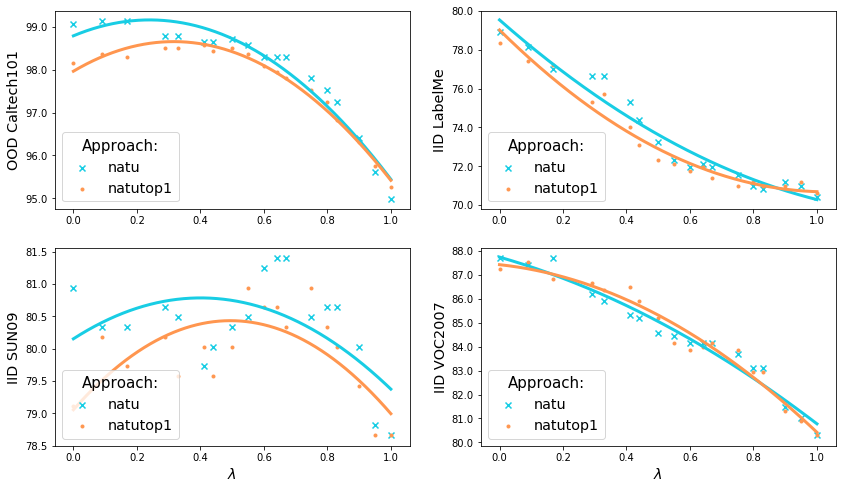

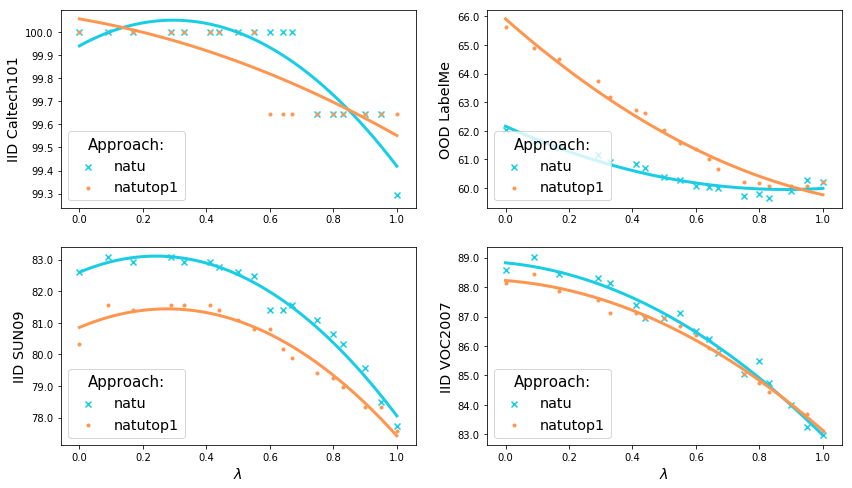

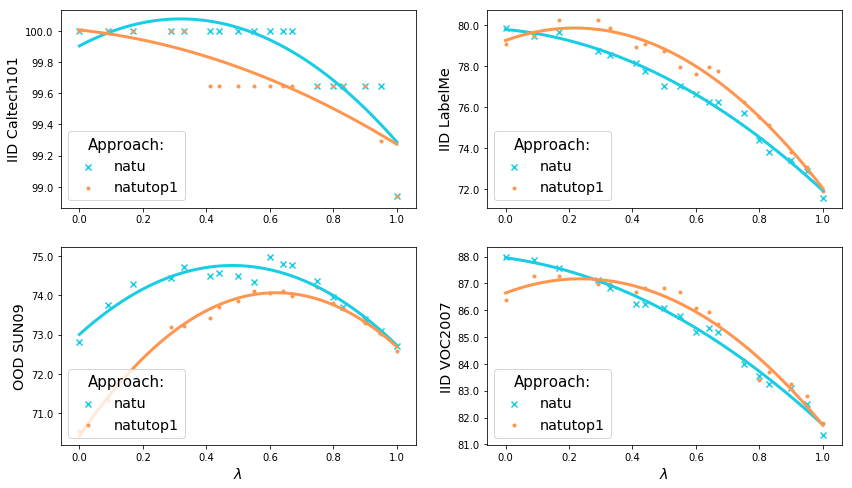

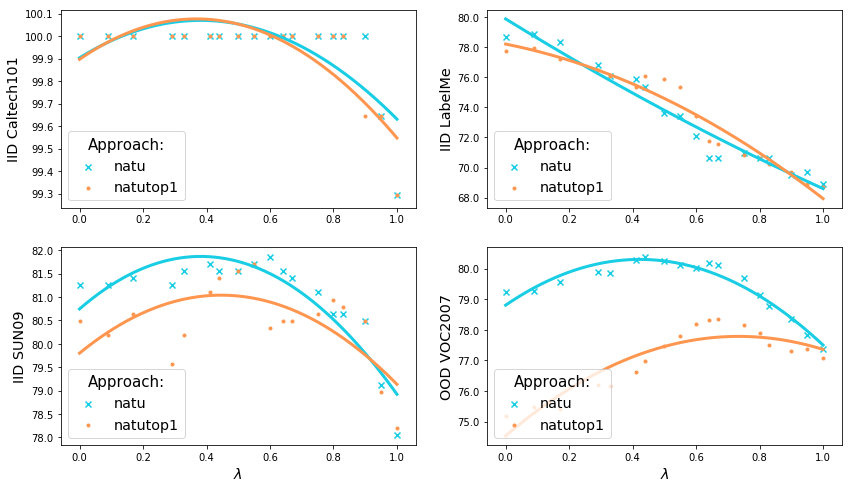

In [22]:
dataset="vlcs"
pt1="natu"
pt2 = "natutop1"
for selected_domain in range(4):
    FAKE = True
    def get_dict_cleanx(x):
        lambda_wrt_dn = float(x.split("_")[0])
        norm_lambda = float(lambda_wrt_dn/(1+lambda_wrt_dn))
        return "{norm_lambda:.2f}".format(norm_lambda=norm_lambda)

    plt.rcParams["figure.figsize"] = (2, 2)

    list_dict_best_value = []
    list_dict_best_value_top1 = []


    list_y = [y if y != str(selected_domain) + "_out" else "ood" for y in ["0_out", "1_out", "2_out", "3_out"] ]
    for domain in range(selected_domain,selected_domain+1):

        labels_wip = sorted(find_data(dataset, domain, pt1).keys())
        labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)

        dict_clean_labels = {
            x: r"$\lambda=$" + str(get_dict_cleanx(x))
            for x in labels_wip}
        for y in list_y:
            dict_best_value = plot_datasets(dataset=dataset, domain=domain, pt=pt1, y=y, r=-1, marker="x", labels=labels_wip)#
            list_dict_best_value.append(dict_best_value)

        labels_wip = sorted(find_data(dataset, domain, pt2).keys())
        labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)
        dict_clean_labels = {
            x: r"$\lambda=$" + str(get_dict_cleanx(x))
            for x in labels_wip}

        for y in list_y:
            dict_best_value = plot_datasets(dataset=dataset, domain=domain, pt=pt2, y=y, r=-1, marker="x", labels=labels_wip)#
            list_dict_best_value_top1.append(dict_best_value)
        #, lines=vlcs2dn.lines)

    l_with_best = []
    labels_wip = sorted(find_data(dataset, domain, pt1).keys())
    labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)

    dict_clean_labels = {
        x: r"$\lambda=$" + str(get_dict_cleanx(x))
        for x in labels_wip}

    for x in labels_wip:
        new_l = {
            "lambda": float(get_dict_cleanx(x)),
            "clean": dict_clean_labels[x],
        }
        for i, y in enumerate(list_y):
            if new_l["clean"] in list_dict_best_value[i]:
                new_l[y] = list_dict_best_value[i][new_l["clean"]]
        l_with_best.append(new_l)  

    labels_wip = sorted(find_data(dataset, domain, pt2).keys())
    labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)
    dict_clean_labels = {
        x: r"$\lambda=$" + str(get_dict_cleanx(x))
        for x in labels_wip}
    l_with_best_top1 = []
    for x in labels_wip:
        new_l = {
            "lambda": float(get_dict_cleanx(x)),
            "clean": dict_clean_labels[x],
        }
        for i, y in enumerate(list_y):
            if new_l["clean"] in list_dict_best_value_top1[i]:
                new_l[y] = list_dict_best_value_top1[i][new_l["clean"]]
        l_with_best_top1.append(new_l) 

    # plot.save_fig(fig_slope, "vlcs0_m_slope.png")
    plt.rcParams["figure.figsize"] = (14, 8)
    kwargs = {
        "legends": ["Approach:"],
        "labels": [pt1, pt2],
        "orders": [2]
    }
    list_domain_names = dict_dataset_to_domain_names[dataset]
    dict_key_to_label = {
        "lambda": r"$\lambda$",
        "ood": "OOD " + list_domain_names[domain],
        "0_out": "IID " + list_domain_names[0],
        "1_out": "IID " + list_domain_names[1],
        "2_out": "IID " + list_domain_names[2],
        "3_out": "IID " + list_domain_names[3],
    }
    fig, axes = plt.subplots(2, 2)
    for i, y in enumerate(list_y):
        ax = axes[i//2][i%2]
        plot_robust_transfer([l_with_best, l_with_best_top1], "lambda", ax1=ax, set_x_label=i//2, key_axis1=y, **kwargs)
    #save_fig(fig, dataset + str(domain) + "_editing_ermdiwa.png")

# Oracle

In [24]:
FAKE = True
METRIC = "best"#"best" # or "last"
def get_dict_cleanx(x):
    lambda_wrt_dn = float(x.split("_")[0])
    norm_lambda = float(lambda_wrt_dn/(1+lambda_wrt_dn))
    return "{norm_lambda:.2f}".format(norm_lambda=norm_lambda)
dataset = "vlcs"
list_dict_best_value = []
list_dict_best_value_top1 = []

for domain in range(0,4):

    list_y = ["ood", str(domain) + "_out"]

    list_dict_best_value.append({})    
    list_dict_best_value_top1.append({})
    labels_wip = sorted(list_vlcsfbnatu[domain].keys())
    labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)

    dict_clean_labels = {
        x: r"$\lambda=$" + str(get_dict_cleanx(x))
        for x in labels_wip}

    for y in list_y:
        dict_best_value = plot_datasets(dataset=dataset, domain=domain, pt="natu", y=y, r=-1, marker="x", labels=labels_wip)#
        list_dict_best_value[-1][y] = dict_best_value

    labels_wip = sorted(list_vlcstop1fbnatu[domain].keys())
    labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)
    dict_clean_labels = {
        x: r"$\lambda=$" + str(get_dict_cleanx(x))
        for x in labels_wip}

    for y in list_y:
        dict_best_value = plot_datasets(dataset=dataset, domain=domain, pt="natutop1", y=y, r=-1, marker="x", labels=labels_wip)#
        list_dict_best_value_top1[-1][y] = dict_best_value
    #, lines=vlcs2dn.lines)

l_with_best_top1 = [[], [], [], []]

for domain in range(4):
    labels_wip = sorted(list_vlcstop1fbnatu[domain].keys())
    labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)
    list_y = ["ood", str(domain) + "_out"]
    dict_clean_labels = {
        x: r"$\lambda=$" + str(get_dict_cleanx(x))
        for x in labels_wip}
    for x in labels_wip:
        new_l = {
            "lambda": float(get_dict_cleanx(x)),
            "clean": dict_clean_labels[x],
        }
        for i, y in enumerate(list_y):
            if new_l["clean"] in list_dict_best_value_top1[domain][y]:
                new_l[y] = list_dict_best_value_top1[domain][y][new_l["clean"]]
        l_with_best_top1[domain].append(new_l)

l_with_best = [[], [], [], []]

for domain in range(4):
    list_y = ["ood", str(domain) + "_out"]
    labels_wip = sorted(list_vlcsfbnatu[domain].keys())
    labels_wip = sorted([l for l in labels_wip], key=lambda x:float(x.split("_")[0]), reverse=True)
    dict_clean_labels = {
        x: r"$\lambda=$" + str(get_dict_cleanx(x))
        for x in labels_wip}
    for x in labels_wip:
        new_l = {
            "lambda": float(get_dict_cleanx(x)),
            "clean": dict_clean_labels[x],
        }
        for i, y in enumerate(list_y):
            if new_l["clean"] in list_dict_best_value[domain][y]:
                new_l[y] = list_dict_best_value[domain][y][new_l["clean"]]
        l_with_best[domain].append(new_l)
def mc(l):
    return mean(l)


In [31]:
l_with_best[domain][7]

{'lambda': 0.64,
 'clean': '$\\lambda=$0.64',
 'ood': 80.18364928909952,
 '3_out': 80.2962962962963}

In [29]:
results_diwa = []
results_erm = []
for domain in range(4):
    list_y = ["ood", str(domain) + "_out"]

    idx_max = max(range(len(l_with_best[domain])), key=lambda x: l_with_best[domain][x][str(domain) + "_out"])
    #idx_max = min(range(len(l_with_best[domain])), key=lambda x: (l_with_best[domain][x]["lambda"] - 0.5)**2)
    #idx_max = [i for i,d in enumerate(l_with_best[domain]) if d["lambda"] 0.5][0]
    #idx_max = -1
    print(idx_max)
    results_diwa.append(l_with_best[domain][idx_max]["ood"])
    
print(" & ".join(["{l:.1f}".format(l=l) for l in results_diwa + [mc(results_diwa)] ]))

15
17
8
7
99.2 & 62.0 & 75.0 & 80.2 & 79.1


In [32]:
results_diwa = []
results_erm = []
for domain in range(4):
    list_y = ["ood", str(domain) + "_out"]

    idx_max = max(range(len(l_with_best[domain])), key=lambda x: l_with_best[domain][x][str(domain) + "_out"])
    #idx_max = min(range(len(l_with_best[domain])), key=lambda x: (l_with_best[domain][x]["lambda"] - 0.5)**2)
    #idx_max = [i for i,d in enumerate(l_with_best[domain]) if d["lambda"] 0.5][0]
    #idx_max = -1
    results_diwa.append(l_with_best[domain][idx_max]["ood"])
    
    idx_max = max(range(len(l_with_best_top1[domain])), key=lambda x: l_with_best_top1[domain][x][str(domain) + "_out"])
    #idx_max = -1
    #idx_max = [i for i,d in enumerate(l_with_best_top1[domain]) if d["lambda"] == 0.5][0]
    #print(l_with_best_top1[domain][idx_max]["lambda"])
    results_erm.append(l_with_best_top1[domain][idx_max]["ood"])
print(" & ".join(["{l:.1f}".format(l=l) for l in results_erm + [mc(results_erm)] ]))
print(" & ".join(["{l:.1f}".format(l=l) for l in results_diwa + [mc(results_diwa)] ]))

98.6 & 65.6 & 74.2 & 78.2 & 79.2
99.2 & 62.0 & 75.0 & 80.2 & 79.1


In [ ]:
kwargs = {
    "legends": ["Approach:"],
    "labels": ["DiWA", "ERM"],
    "orders": [2]
}
plt.rcParams["figure.figsize"] = (14, 16)
fig, axes = plt.subplots(4, 2)
for domain in range(4):
    list_y = ["ood", str(domain) + "_out"]
    for i, y in enumerate(list_y):
        ax = axes[domain][i]
        plot_robust_transfer([l_with_best[domain], l_with_best_top1[domain]], "lambda", ax1=ax, set_x_label=i//2, key_axis1=y, **kwargs)